In [46]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image
from math import floor
import numpy as np

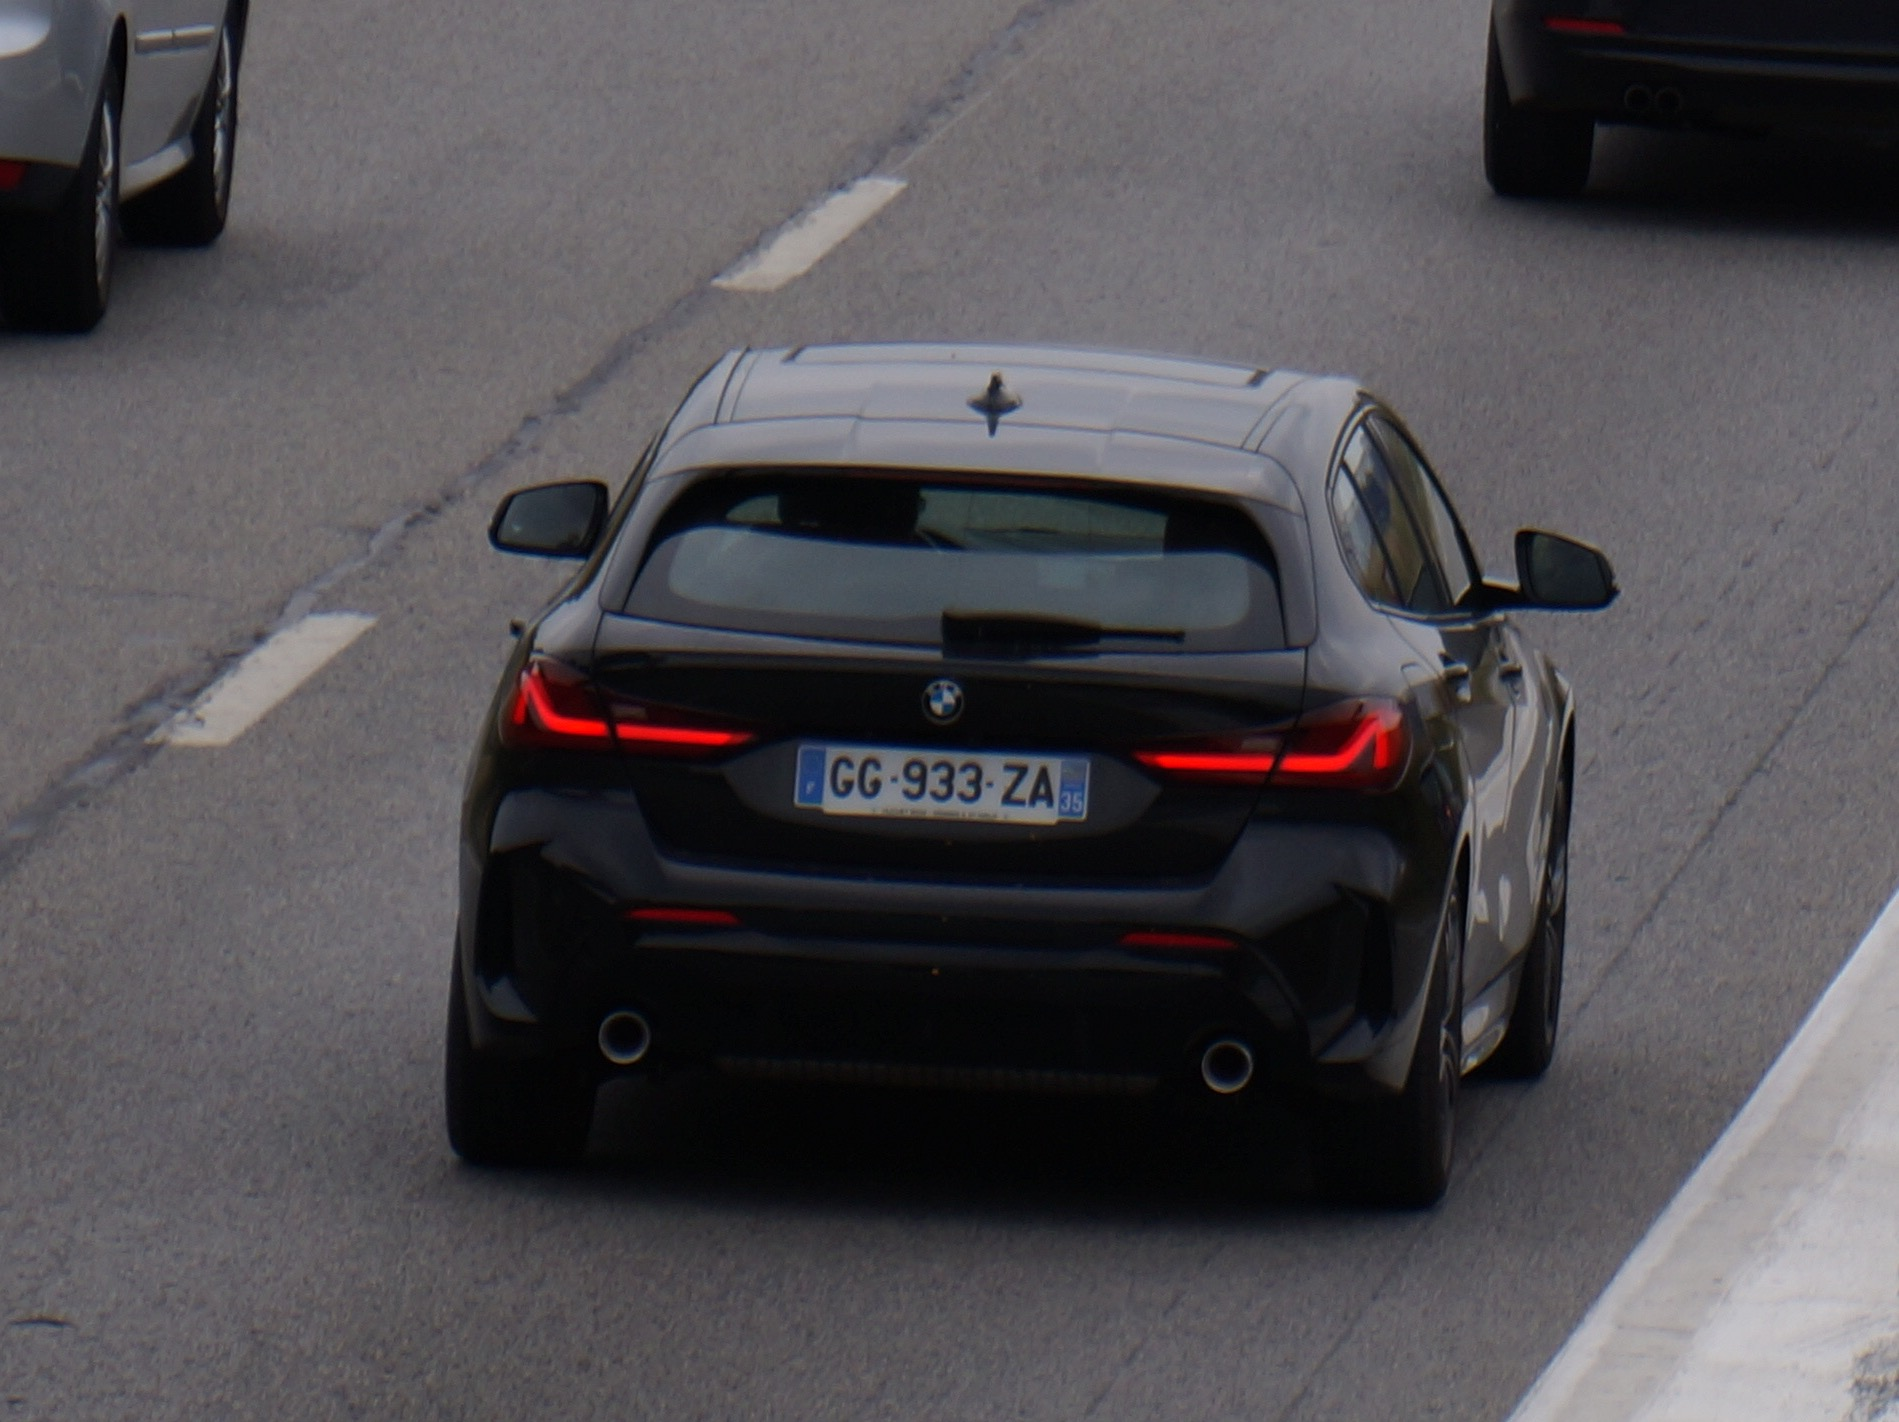

In [87]:
Image("temp_img/test.jpg")

In [88]:
reader = easyocr.Reader(['en'])

In [89]:
output = reader.readtext('temp_img/test.jpg')
cord = output[-1][0]

In [111]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
range_y = y_max - y_min
y_min = floor(y_min + 0.05 * range_y)
y_max = floor(y_max - 0.05 * range_y)
x_min_min = floor(x_min - (x_max - x_min) * 0.1)

In [104]:
x_min

795

In [116]:
image = cv2.imread('temp_img/test.jpg')
def is_blue_dominant(img):
    b, g, r = cv2.split(img)
    return np.mean(b) > np.mean(g)*1.25 and np.mean(b) > np.mean(r)*1.25

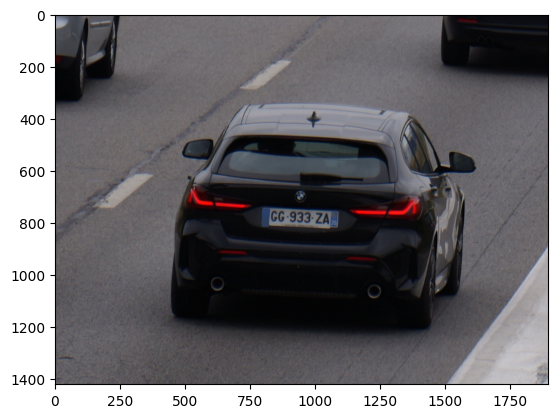

In [117]:
roi = image[y_min:y_max, x_min_min:x_min]

# Check for blue dominance in the region
if is_blue_dominant(roi):
    # Apply blur
    blurred_roi = cv2.GaussianBlur(roi, (99,99), 30)
    image[y_min:y_max, x_min_min:x_min] = blurred_roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))